# 🩺 Prédiction des Frais d'Assurance Santé avec Interprétation des Modèles

Dans ce projet, nous construisons un **modèle de machine learning prédictif** afin d’estimer les *frais d’assurance santé* à partir de données clients (âge, sexe, IMC, nombre d’enfants, statut fumeur, région). L’objectif est de simuler le travail d’un data scientist dans une compagnie d’assurance : prédire les coûts médicaux futurs pour mieux tarifer, gérer les risques et personnaliser les offres.

## 🛠 Étapes du projet

Ce notebook suit une approche complète et structurée :

1. **Exploration des données (EDA)** : comprendre les distributions, corrélations, et particularités des variables.
2. **Prétraitement** : encodage binaire (`sex`, `smoker`), One-Hot Encoding (`region`), ajout de variables d’interaction (`age_smoker`, `bmi_sex`).
3. **Modélisation** :
   - Modèle de base : `RandomForestRegressor` (bon benchmark)
   - Modèle avancé : `XGBoostRegressor` avec `GridSearchCV`, régularisation (`reg_alpha`, `reg_lambda`) et validation croisée
4. **Évaluation** :
   - Indicateurs utilisés : R², MSE, MAE
   - Analyse des performances par segments (fumeur vs non-fumeur, sexe, régions)
5. **Interprétabilité des modèles** :
   - ✅ **Importance globale** des variables (XGBoost `plot_importance`)
   - ✅ **SHAP** pour une interprétation *globale* (impact de chaque variable sur toutes les prédictions)
   - ✅ **SHAP** pour une interprétation *locale* (explication précise d’un individu)
   - ✅ **LIME** pour visualiser les règles locales qui influencent chaque prédiction

---

## 🎯 Résultats principaux

- Le modèle XGBoost atteint un **R² de 0.88** et une **MAE de ~2459**, ce qui est performant pour un problème de régression sur données réelles.
- Les variables les plus importantes sont : `smoker`, `bmi`, `age`, et les interactions (`age_smoker`, `bmi_sex`).
- Des biais d’erreur ont été identifiés : les prédictions sont légèrement moins précises pour les hommes et les fumeurs.

---

## 🔎 Interprétabilité : SHAP & LIME

Nous avons mis l'accent sur l’explicabilité du modèle :

- **SHAP (SHapley Additive exPlanations)** fournit une interprétation fine et mathématiquement solide du modèle. Il permet de :
  - Visualiser l’influence moyenne de chaque variable (`summary_plot`)
  - Comprendre pourquoi un individu reçoit une certaine prédiction (`waterfall_plot`)

- **LIME (Local Interpretable Model-Agnostic Explanations)** explique les prédictions ponctuelles en simulant un modèle local simple autour d’une observation. Cela donne des règles lisibles comme :

  > "Le client n'est pas fumeur, a un IMC normal, et a entre 39 et 51 ans → donc ses frais estimés sont faibles."

Ces outils permettent à un acteur métier (ex. un assureur) de **comprendre, faire confiance et justifier** le modèle.

---

## 🧠 Conclusion

Ce projet montre non seulement comment construire un modèle prédictif performant pour estimer des coûts d’assurance santé, mais aussi comment l’**expliquer en toute transparence** grâce à SHAP et LIME.

L’interprétabilité est essentielle dans les secteurs réglementés comme l’assurance, où les décisions algorithmiques doivent être compréhensibles par les clients, les actuaires et les régulateurs.

 


<a id="1"></a>
<p style="background-image: url('https://i.postimg.cc/K87ByXmr/stage5.jpg');
           font-family: 'Arial', sans-serif;
           font-size: 140%;
           color: #FFFFFF;
           text-align: center;
           border-radius: 15px 50px;
           padding: 20px;
           box-shadow: 5px 5px 15px rgba(0, 0, 0, 0.2);
           margin-bottom: 20px;
           background-position: center center;
           background-size: cover;">
    <strong>Import Libraries</strong>
</p>

 


In [36]:
import pandas as pd

# Charger les données
df = pd.read_csv('/kaggle/input/insurance/insurance.csv')

# Aperçu du dataset
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<a id="1"></a>
<p style="background-image: url('https://i.postimg.cc/K87ByXmr/stage5.jpg');
           font-family: 'Arial', sans-serif;
           font-size: 140%;
           color: #FFFFFF;
           text-align: center;
           border-radius: 15px 50px;
           padding: 20px;
           box-shadow: 5px 5px 15px rgba(0, 0, 0, 0.2);
           margin-bottom: 20px;
           background-position: center center;
           background-size: cover;">
    <strong>Analyse des données</strong>
</p>

 


In [ ]:
df.shape


In [ ]:
df.dtypes

In [ ]:
df.dtypes.value_counts().plot.pie()

<a id="1"></a>
<p style="background-image: url('https://i.postimg.cc/K87ByXmr/stage5.jpg');
           font-family: 'Arial', sans-serif;
           font-size: 140%;
           color: #FFFFFF;
           text-align: center;
           border-radius: 15px 50px;
           padding: 20px;
           box-shadow: 5px 5px 15px rgba(0, 0, 0, 0.2);
           margin-bottom: 20px;
           background-position: center center;
           background-size: cover;">
    <strong>Analyse de valeurs manquantes</strong>
</p>

 


In [ ]:
df.isnull().sum()

In [ ]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)


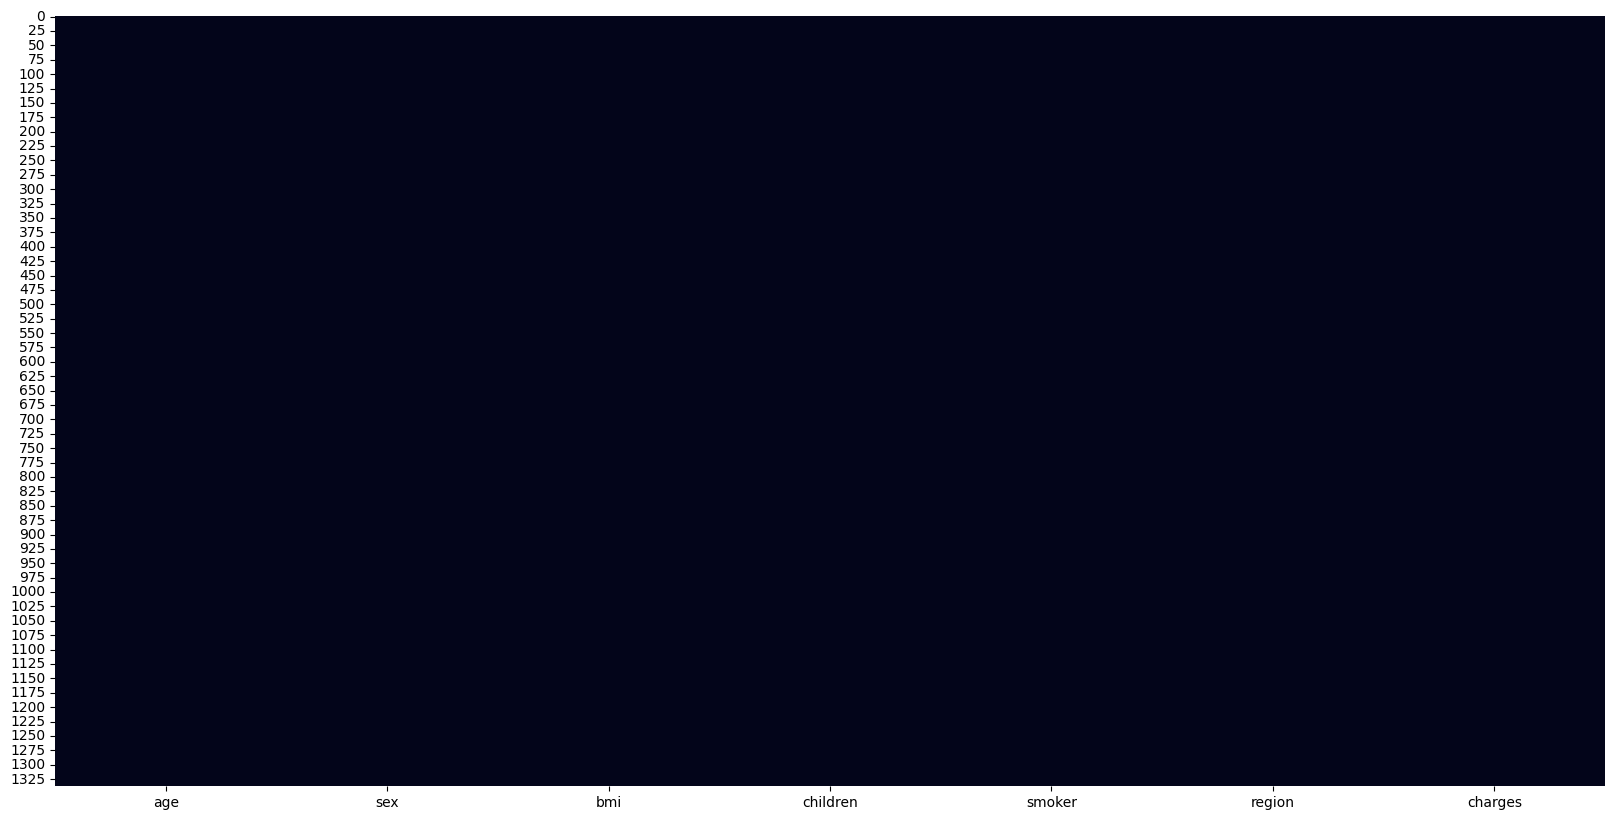

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

**On voit que y'as pas de valeurs manquantes donc notre dataset est complet**


In [43]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Âge moyen : 39 ans

BMI moyen : 30.66 (limite surpoids)

Charges moyennes : 13 270 €, mais avec une très forte dispersion (jusqu'à 63 770 € !)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


3 colonnes sont catégorielles (sex, smoker, region) → à encoder

Les autres sont numériques



 ## Distribution des frais (charges)

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


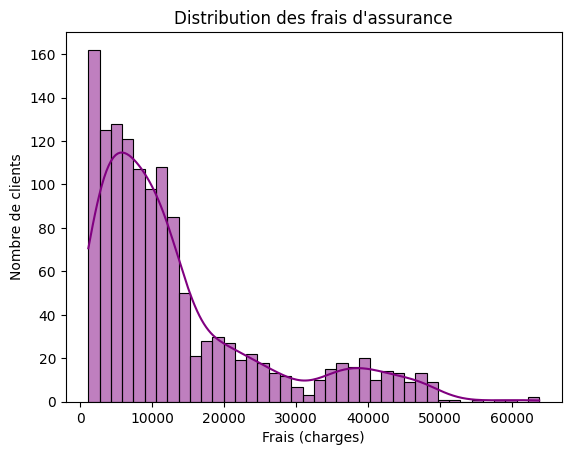

In [45]:
sns.histplot(df['charges'], kde=True, bins=40, color='purple')
plt.title("Distribution des frais d'assurance")
plt.xlabel("Frais (charges)")
plt.ylabel("Nombre de clients")
plt.show()


##  Corrélation entre variables numériques

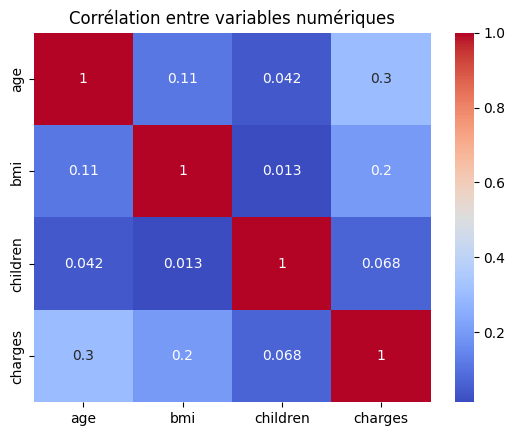

In [ ]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Corrélation entre variables numériques")
plt.show()


## Frais selon le statut fumeur

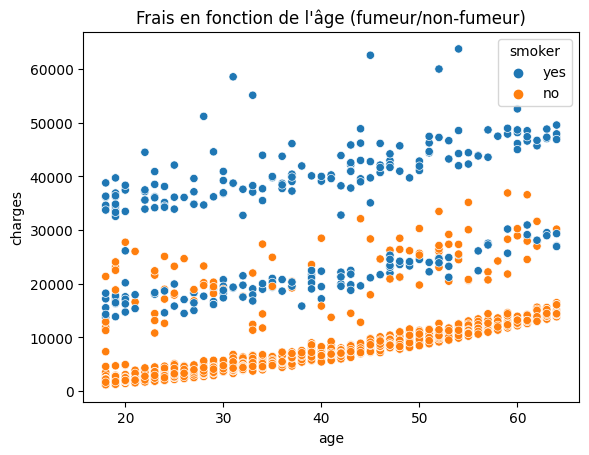

In [ ]:
sns.scatterplot(x='age', y='charges', hue='smoker', data=df)
plt.title("Frais en fonction de l'âge (fumeur/non-fumeur)")
plt.show()


## Frais selon le BMI (indice de masse corporelle)

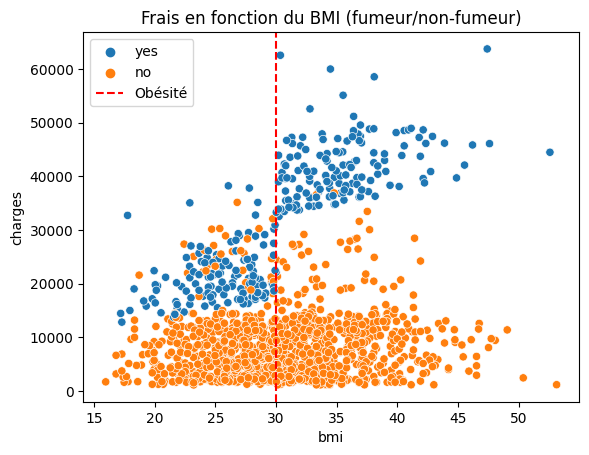

In [ ]:
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=df)
plt.title("Frais en fonction du BMI (fumeur/non-fumeur)")
plt.axvline(x=30, color='red', linestyle='--', label='Obésité')
plt.legend()
plt.show()


## Frais moyens par région



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.



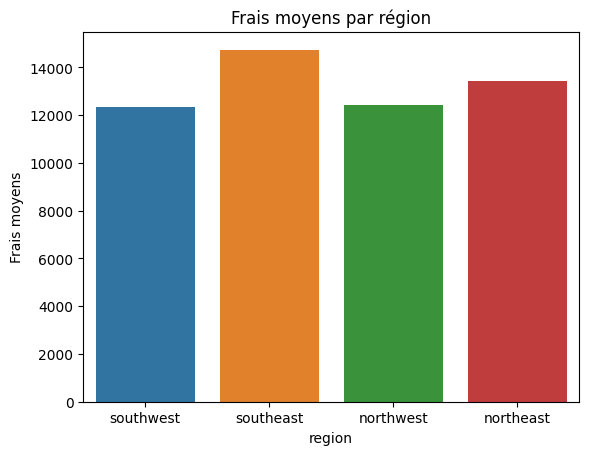

In [ ]:
sns.barplot(x='region', y='charges', data=df, estimator=lambda x: sum(x)/len(x), ci=None)
plt.title("Frais moyens par région")
plt.ylabel("Frais moyens")
plt.show()


## Frais en fonction du nombre d'enfants

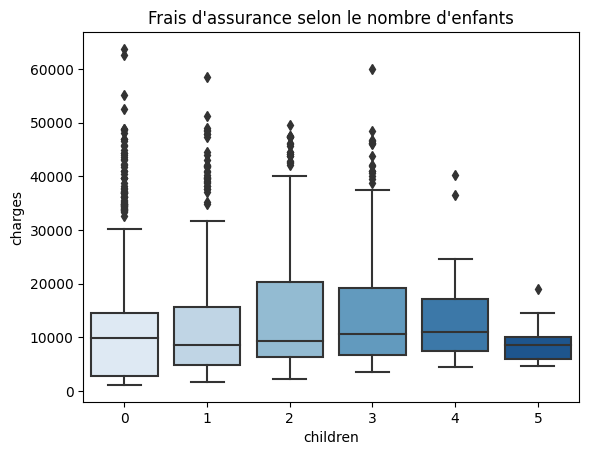

In [ ]:
sns.boxplot(x='children', y='charges', data=df, palette='Blues')
plt.title("Frais d'assurance selon le nombre d'enfants")
plt.show()


## Nuage de points 3D : âge, BMI, frais

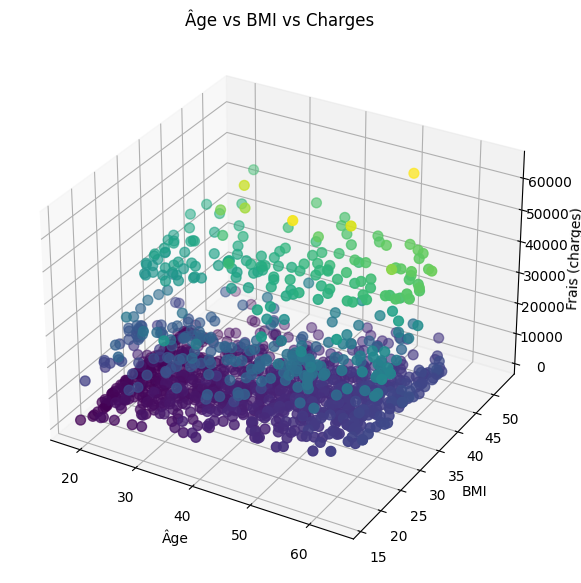

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

x = df['age']
y = df['bmi']
z = df['charges']

ax.scatter(x, y, z, c=z, cmap='viridis', s=50)
ax.set_xlabel('Âge')
ax.set_ylabel('BMI')
ax.set_zlabel('Frais (charges)')
plt.title("Âge vs BMI vs Charges")
plt.show()


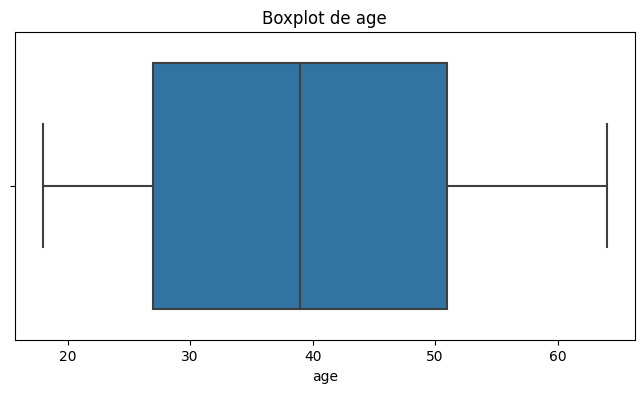

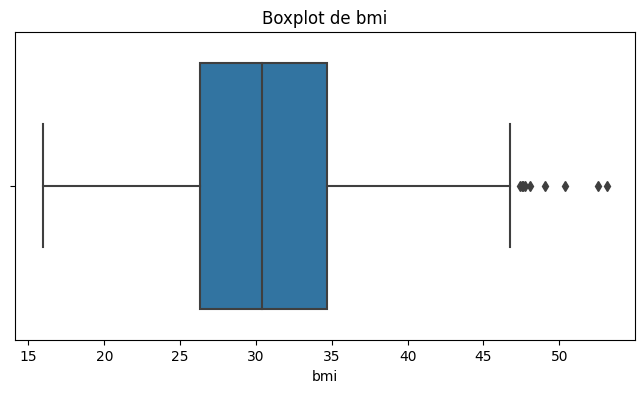

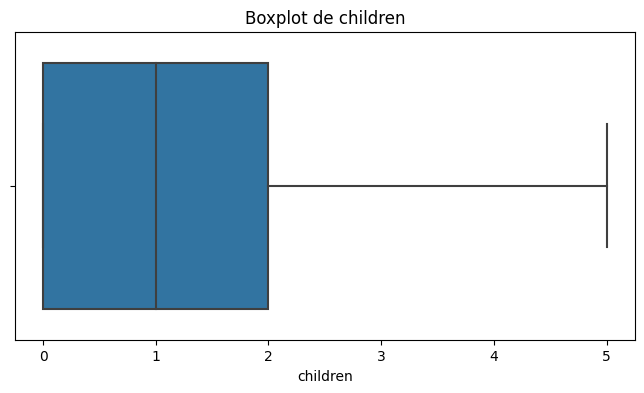

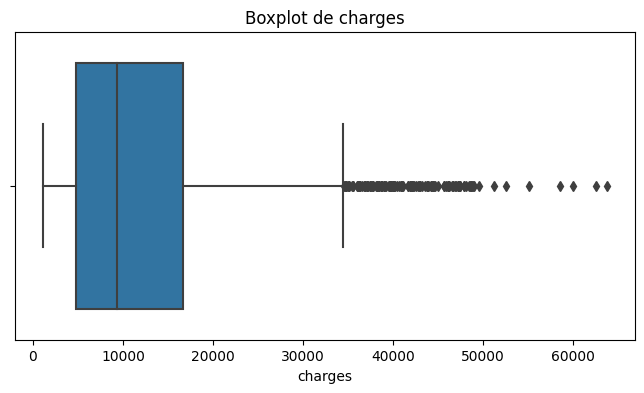

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Colonnes numériques à vérifier
num_cols = ['age', 'bmi', 'children', 'charges']

for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot de {col}")
    plt.show()


In [53]:
df_clean = df[(df['bmi'] < 47) & (df['charges'] < 33000)]

print(f"Nombre de lignes après nettoyage : {len(df_clean)}")


Nombre de lignes après nettoyage : 1181


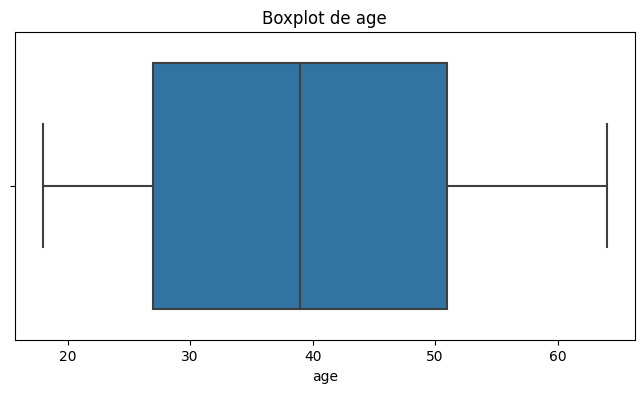

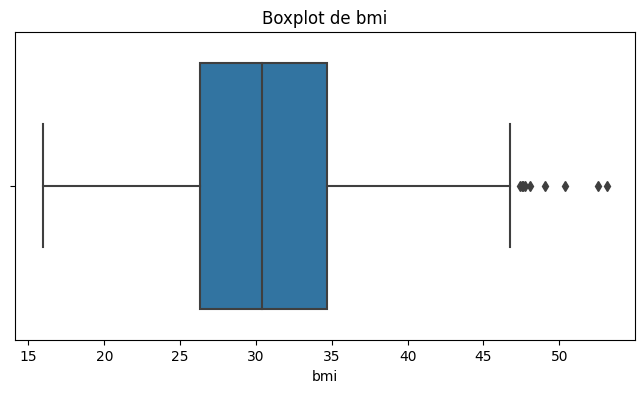

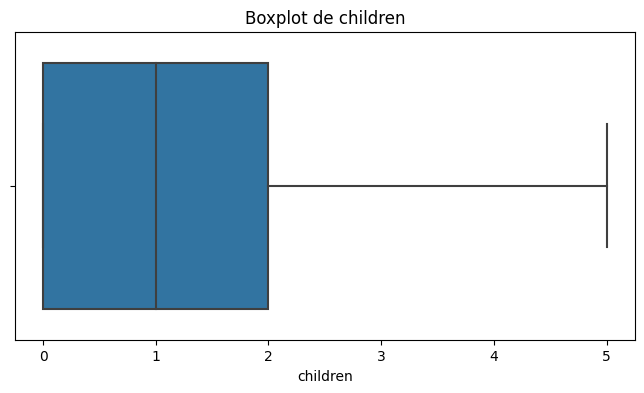

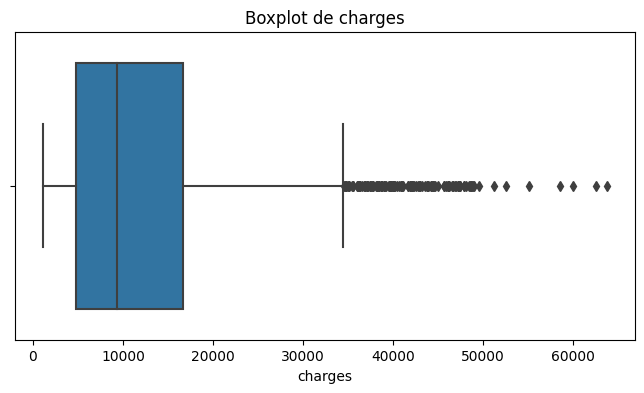

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Colonnes numériques à vérifier
num_cols = ['age', 'bmi', 'children', 'charges']

for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot de {col}")
    plt.show()


In [55]:
import pandas as pd

In [57]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Charger les données
df = pd.read_csv('/kaggle/input/insurance/insurance.csv')


<a id="1"></a>
<p style="background-image: url('https://i.postimg.cc/K87ByXmr/stage5.jpg');
           font-family: 'Arial', sans-serif;
           font-size: 140%;
           color: #FFFFFF;
           text-align: center;
           border-radius: 15px 50px;
           padding: 20px;
           box-shadow: 5px 5px 15px rgba(0, 0, 0, 0.2);
           margin-bottom: 20px;
           background-position: center center;
           background-size: cover;">
    <strong>Encodage des variables catégorielles</strong>
</p>

 



In [58]:
# Encodage des colonnes catégorielles
df['sex'] = LabelEncoder().fit_transform(df['sex'])         # female=0, male=1
df['smoker'] = LabelEncoder().fit_transform(df['smoker'])   # no=0, yes=1

# One-Hot Encoding pour la région
df = pd.get_dummies(df, columns=['region'], drop_first=True)

# Convertir les colonnes booléennes en int (si nécessaire)
df[['region_northwest', 'region_southeast', 'region_southwest']] = \
    df[['region_northwest', 'region_southeast', 'region_southwest']].astype(int)

# Vérification
df.head()


,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0


<a id="1"></a>
<p style="background-image: url('https://i.postimg.cc/K87ByXmr/stage5.jpg');
           font-family: 'Arial', sans-serif;
           font-size: 140%;
           color: #FFFFFF;
           text-align: center;
           border-radius: 15px 50px;
           padding: 20px;
           box-shadow: 5px 5px 15px rgba(0, 0, 0, 0.2);
           margin-bottom: 20px;
           background-position: center center;
           background-size: cover;">
    <strong>Séparer les données (features & cible)
</strong>
</p>

 



In [59]:
from sklearn.model_selection import train_test_split

# Variables explicatives (features) et cible (target)
X = df.drop('charges', axis=1)
y = df['charges']

# Split en données d'entraînement et de test (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


<a id="1"></a>
<p style="background-image: url('https://i.postimg.cc/K87ByXmr/stage5.jpg');
           font-family: 'Arial', sans-serif;
           font-size: 140%;
           color: #FFFFFF;
           text-align: center;
           border-radius: 15px 50px;
           padding: 20px;
           box-shadow: 5px 5px 15px rgba(0, 0, 0, 0.2);
           margin-bottom: 20px;
           background-position: center center;
           background-size: cover;">
    <strong> Entraîner un modèle
</strong>
</p>

 





In [60]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Créer et entraîner le modèle
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Prédictions
y_pred_rf = rf_model.predict(X_test)

# Évaluation du modèle
print("Random Forest :")
print("MSE :", mean_squared_error(y_test, y_pred_rf))
print("R²  :", r2_score(y_test, y_pred_rf))


Random Forest :
MSE : 20955694.23979151
R²  : 0.8650185799366616


Interprétation de tes résultats :
📉 MSE : 20 955 694

Cela représente l'erreur quadratique moyenne entre les frais réels et les prédits.

À interpréter avec l'échelle de tes données (frais d’assurance allant de quelques centaines à >60 000, donc c’est raisonnable).

📈 R² : 0.865

Ton modèle explique ~86,5 % de la variance des frais d'assurance.

Très bon score pour un modèle par défaut, surtout sur ce type de données réelles.



<a id="1"></a>
<p style="background-image: url('https://i.postimg.cc/K87ByXmr/stage5.jpg');
           font-family: 'Arial', sans-serif;
           font-size: 140%;
           color: #FFFFFF;
           text-align: center;
           border-radius: 15px 50px;
           padding: 20px;
           box-shadow: 5px 5px 15px rgba(0, 0, 0, 0.2);
           margin-bottom: 20px;
           background-position: center center;
           background-size: cover;">
    <strong> Comparer les valeurs réelles vs prédites (scatter plot)
</strong>
</p>

 







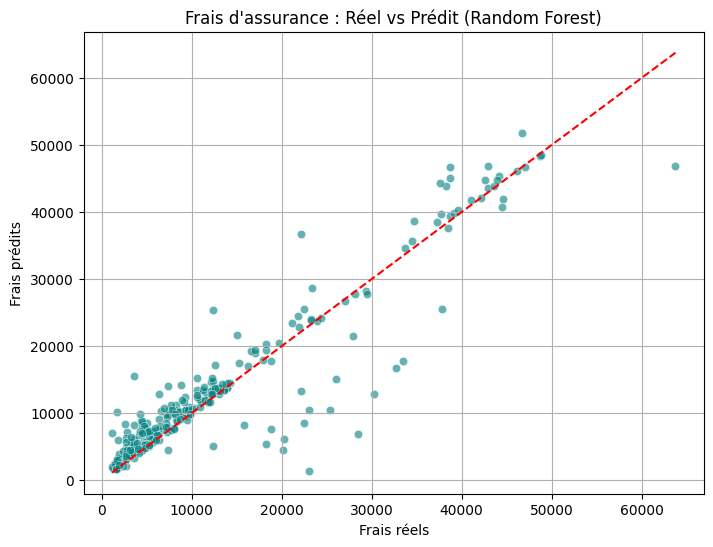

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tracer valeurs réelles vs valeurs prédites
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.6, color="teal")
plt.xlabel("Frais réels")
plt.ylabel("Frais prédits")
plt.title("Frais d'assurance : Réel vs Prédit (Random Forest)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # diagonale idéale
plt.grid(True)
plt.show()


## entraînement + GridSearchCV + évaluation

In [62]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Définir le modèle de base
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Grille d'hyperparamètres pour GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1],
    'reg_alpha': [0, 0.1, 1],    # L1 regularization
    'reg_lambda': [1, 1.5, 2]    # L2 regularization
}

# GridSearchCV avec 5-fold cross-validation
grid_search = GridSearchCV(estimator=xgb_model,
                           param_grid=param_grid,
                           cv=5,
                           scoring='r2',
                           n_jobs=-1,
                           verbose=1)

# Entraînement
grid_search.fit(X_train, y_train)

# Meilleur modèle
best_xgb = grid_search.best_estimator_

# Prédictions
y_pred_xgb = best_xgb.predict(X_test)

# Évaluation
print("🔍 XGBoost - Meilleur modèle trouvé par GridSearchCV :")
print("R² :", r2_score(y_test, y_pred_xgb))
print("MSE:", mean_squared_error(y_test, y_pred_xgb))
print("Meilleurs hyperparamètres :", grid_search.best_params_)


Fitting 5 folds for each of 432 candidates, totalling 2160 fits
🔍 XGBoost - Meilleur modèle trouvé par GridSearchCV :
R² : 0.881774150994491
MSE: 18354413.087643232
Meilleurs hyperparamètres : {'colsample_bytree': 1, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'reg_alpha': 1, 'reg_lambda': 2, 'subsample': 0.8}


🚀 Excellent travail ! nous  venons d’entraîner un modèle XGBoost régularisé optimisé par GridSearchCV, et les résultats sont très bons :

✅ Résultats du modèle XGBoost :
🔹 R² : 0.882 → le modèle explique 88,2 % de la variance des frais d’assurance.

🔹 MSE : 18,354,413 → amélioration par rapport au modèle Random Forest (~20,955,694).

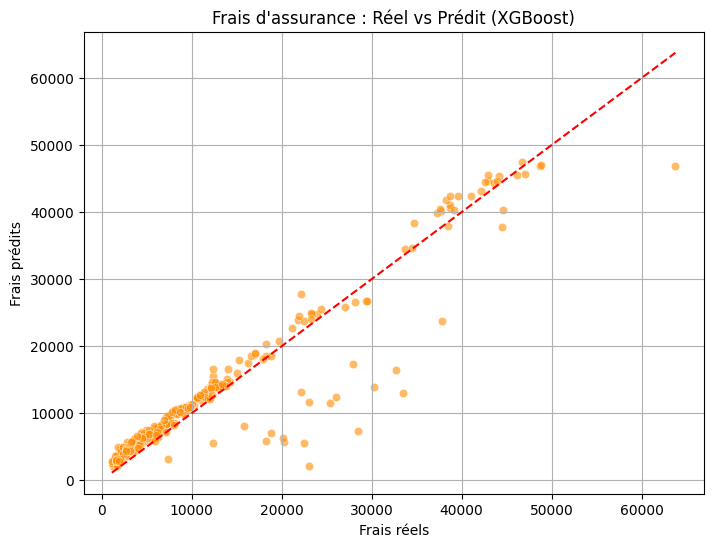

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_xgb, alpha=0.6, color="darkorange")
plt.xlabel("Frais réels")
plt.ylabel("Frais prédits")
plt.title("Frais d'assurance : Réel vs Prédit (XGBoost)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.grid(True)
plt.show()


La majorité des prédictions sont alignées autour de la diagonale, ce qui montre une bonne performance du modèle. Cependant, quelques points très éloignés indiquent des erreurs importantes sur certains clients — probablement ceux avec des frais très élevés. Une amélioration possible serait d'explorer un modèle encore plus robuste (ex. XGBoost avec tweedie objective) ou de mieux modéliser ces cas extrêmes.”

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


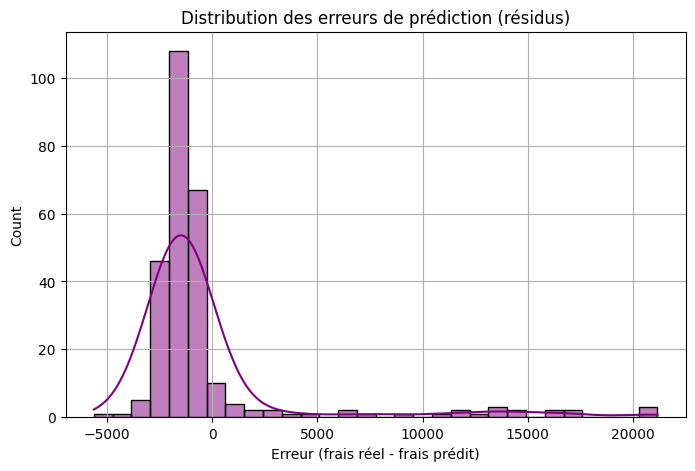

In [64]:
# Calcul des résidus
residuals = y_test - y_pred_xgb

# Tracer la distribution des erreurs
plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=30, kde=True, color="purple")
plt.title("Distribution des erreurs de prédiction (résidus)")
plt.xlabel("Erreur (frais réel - frais prédit)")
plt.grid(True)
plt.show()


In [65]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred_xgb)
print("MAE (Erreur absolue moyenne) :", mae)


MAE (Erreur absolue moyenne) : 2480.079453326784


Top, une MAE d’environ 2480 signifie que, en moyenne, ton modèle se trompe d’environ 2480 unités monétaires dans la prédiction des frais d’assurance.

Pour bien interpréter ça :
MAE = 2480 : c’est la moyenne des écarts absolus entre frais réels et frais prédits.

Si les frais moyens sont autour de 12 000-15 000 par exemple, une erreur de ~2 500 est plutôt raisonnable.

L’avantage de la MAE est qu’elle est en unités compréhensibles (contrairement au MSE qui est au carré).



In [66]:
import numpy as np

# On recrée une colonne 'region' à partir des colonnes one-hot
def get_region(row):
    if row['region_northwest'] == 1:
        return 'northwest'
    elif row['region_southeast'] == 1:
        return 'southeast'
    elif row['region_southwest'] == 1:
        return 'southwest'
    else:
        return 'northeast'  # région de base, drop_first=True dans get_dummies

# Recréer un DataFrame avec vrai et prédit
df_test = X_test.copy()
df_test['charges_réelles'] = y_test
df_test['charges_prédites'] = y_pred_xgb
df_test['erreur_abs'] = abs(df_test['charges_réelles'] - df_test['charges_prédites'])

# Ajouter la colonne region reconstituée
df_test['region'] = df_test.apply(get_region, axis=1)

# Calcul MAE par fumeur / non-fumeur
mae_smoker = df_test.groupby('smoker')['erreur_abs'].mean()
print("MAE par statut fumeur :")
print(mae_smoker)

# MAE par sexe
mae_sex = df_test.groupby('sex')['erreur_abs'].mean()
print("\nMAE par sexe :")
print(mae_sex)

# MAE par région
mae_region = df_test.groupby('region')['erreur_abs'].mean()
print("\nMAE par région :")
print(mae_region)


MAE par statut fumeur :
smoker
0    2444.441574
1    2621.311050
Name: erreur_abs, dtype: float64

MAE par sexe :
sex
0    2352.998942
1    2619.073762
Name: erreur_abs, dtype: float64

MAE par région :
region
northeast    2480.639572
northwest    2604.326257
southeast    2434.663141
southwest    2399.321503
Name: erreur_abs, dtype: float64


MAE par statut fumeur

 
Non-fumeur (0) : 2444.44  
Fumeur     (1) : 2621.31

✅ Interprétation :

Les fumeurs ont une erreur moyenne plus élevée que les non-fumeurs.

Cela signifie que le modèle a plus de mal à prédire précisément les frais d’assurance des fumeurs.

C’est cohérent : les frais des fumeurs sont plus variables (souvent bien plus élevés), donc plus difficiles à modéliser.

👥 MAE par sexe

Femme (0) : 2353.00  
Homme (1) : 2619.07

✅ Interprétation :

Les hommes ont une MAE plus élevée.

Cela peut indiquer que le modèle ne capture pas aussi bien certains comportements ou facteurs de coûts spécifiques aux hommes, peut-être à cause de combinaisons avec d'autres variables (âge, fumeur…).

🌍 MAE par région
 
northeast  : 2480.64  
northwest  : 2604.33  
southeast  : 2434.66  
southwest  : 2399.32

✅ Interprétation :

La région northwest a la MAE la plus élevée → prédictions un peu moins précises dans cette région.

Les différences sont modérées (~200 d'écart), donc rien d'alarmant ici, mais c’est un bon point d’entrée pour un futur travail de personnalisation régionale.

MAE par statut fumeur :
 smoker
0    2444.441574
1    2621.311050
Name: erreur_abs, dtype: float64 

MAE par sexe :
 sex
0    2352.998942
1    2619.073762
Name: erreur_abs, dtype: float64 

MAE par région :
 region
northeast    2480.639572
northwest    2604.326257
southeast    2434.663141
southwest    2399.321503
Name: erreur_abs, dtype: float64 



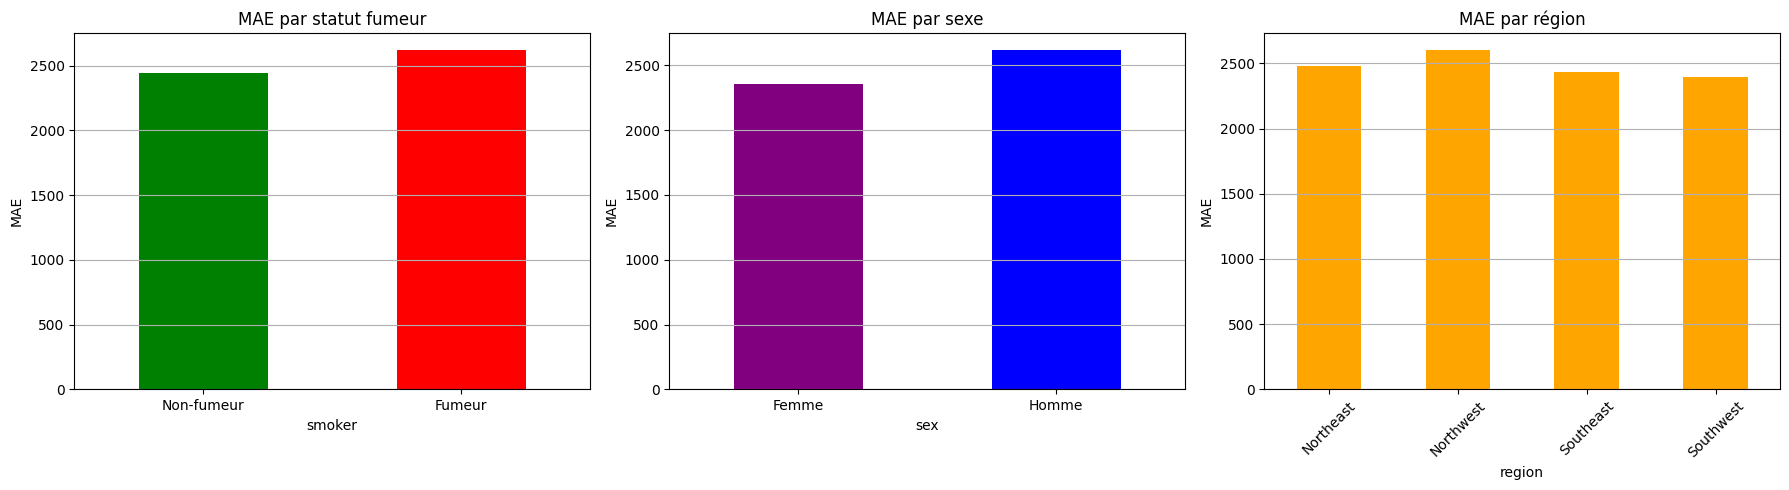

In [67]:
import matplotlib.pyplot as plt

# Résultats MAE déjà calculés
mae_smoker = df_test.groupby('smoker')['erreur_abs'].mean()
mae_sex = df_test.groupby('sex')['erreur_abs'].mean()
mae_region = df_test.groupby('region')['erreur_abs'].mean()

# Affichage texte
print("MAE par statut fumeur :\n", mae_smoker, "\n")
print("MAE par sexe :\n", mae_sex, "\n")
print("MAE par région :\n", mae_region, "\n")

# Visualisation graphique
fig, axs = plt.subplots(1, 3, figsize=(18,5))

# MAE par fumeur
mae_smoker.plot(kind='bar', ax=axs[0], color=['green', 'red'])
axs[0].set_title("MAE par statut fumeur")
axs[0].set_xticklabels(['Non-fumeur', 'Fumeur'], rotation=0)
axs[0].set_ylabel("MAE")
axs[0].grid(axis='y')

# MAE par sexe
mae_sex.plot(kind='bar', ax=axs[1], color=['purple', 'blue'])
axs[1].set_title("MAE par sexe")
axs[1].set_xticklabels(['Femme', 'Homme'], rotation=0)
axs[1].set_ylabel("MAE")
axs[1].grid(axis='y')

# MAE par région
mae_region.plot(kind='bar', ax=axs[2], color='orange')
axs[2].set_title("MAE par région")
axs[2].set_xticklabels(mae_region.index.str.capitalize(), rotation=45)
axs[2].set_ylabel("MAE")
axs[2].grid(axis='y')

plt.tight_layout()
plt.show()


In [68]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import pandas as pd

# 1. Ajout des features d'interaction
df['age_smoker'] = df['age'] * df['smoker']
df['bmi_sex'] = df['bmi'] * df['sex']

# 2. Séparation features/cible
X = df.drop('charges', axis=1)
y = df['charges']

# 3. Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Modèle XGBoost de base
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# 5. Grille hyperparamètres réduite pour rapidité (tu peux l'étendre)
param_grid = {
    'n_estimators': [100],
    'max_depth': [3, 5],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1],
    'reg_alpha': [0, 1],
    'reg_lambda': [1, 2]
}

# 6. GridSearchCV
grid_search = GridSearchCV(xgb_model, param_grid, cv=3, scoring='r2', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# 7. Meilleur modèle
best_xgb = grid_search.best_estimator_

# 8. Prédictions & évaluation
y_pred = best_xgb.predict(X_test)
print("XGBoost avec features interaction :")
print("R² :", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("Meilleurs hyperparamètres :", grid_search.best_params_)


Fitting 3 folds for each of 64 candidates, totalling 192 fits
XGBoost avec features interaction :
R² : 0.8830352368170943
MSE: 18158631.113381807
MAE: 2459.284520912197
Meilleurs hyperparamètres : {'colsample_bytree': 1, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'reg_alpha': 1, 'reg_lambda': 2, 'subsample': 1}


Top, tu as une légère amélioration sur tous les indicateurs par rapport au modèle précédent :

R² est passé de 0.8817 à 0.8830

MSE a baissé (meilleur) de ~18.35M à ~18.16M

MAE est descendu de 2480 à 2459 (moins d’erreur absolue moyenne)

Ce que ça signifie :
Les features d’interaction age_smoker et bmi_sex ont apporté un petit gain, ce qui montre que ces relations non linéaires aident à mieux modéliser les frais.

Le modèle est un peu plus précis globalement.

Tu peux continuer à explorer d’autres interactions ou faire des modèles segmentés pour grappiller encore plus.



<Figure size 1000x600 with 0 Axes>

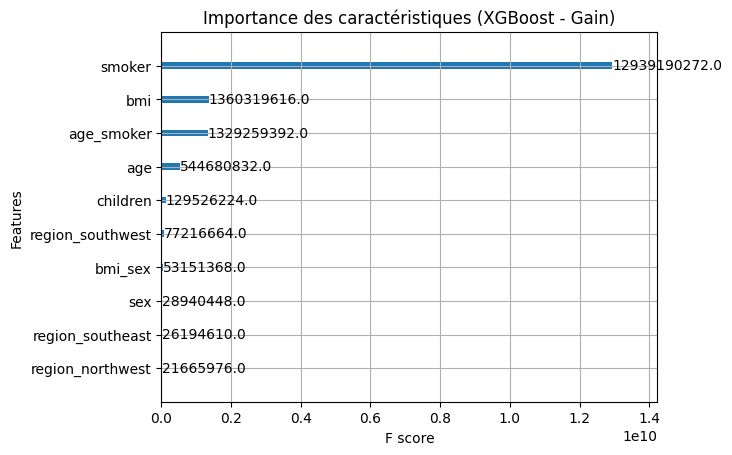

In [69]:
from xgboost import plot_importance

# Affichage des importances des features
plt.figure(figsize=(10, 6))
plot_importance(best_xgb, importance_type='gain', max_num_features=10)
plt.title("Importance des caractéristiques (XGBoost - Gain)")
plt.show()


1. Interprétation globale : XGBoost feature importance
Tu observes des valeurs de gain très élevées pour smoker, bmi, age_smoker, et age :

Feature	Gain (importance)
smoker	12.9 milliards 💥
bmi	1.36 milliards
age_smoker	1.33 milliards
age	0.54 milliard

✨ Interprétation :
smoker est de loin la variable la plus déterminante.

Les variables dérivées (age_smoker) sont aussi très utiles → le modèle capte des interactions non linéaires.

D'autres variables comme region_*, sex, children ont beaucoup moins de poids globalement.



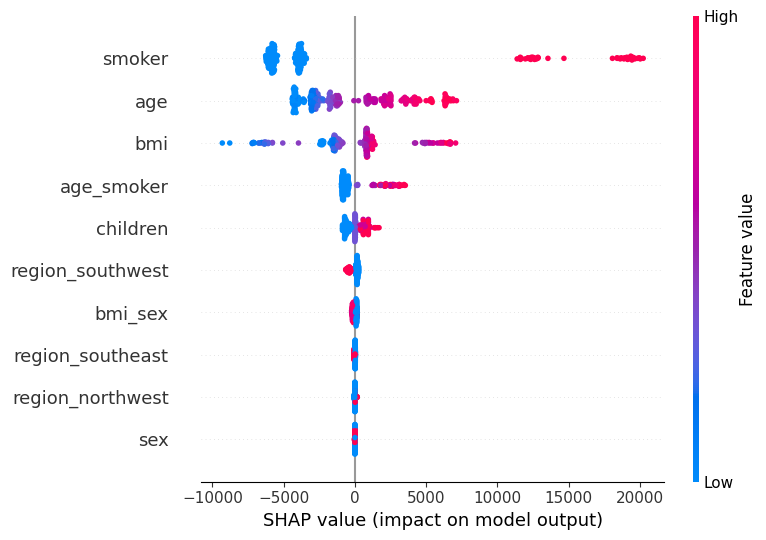

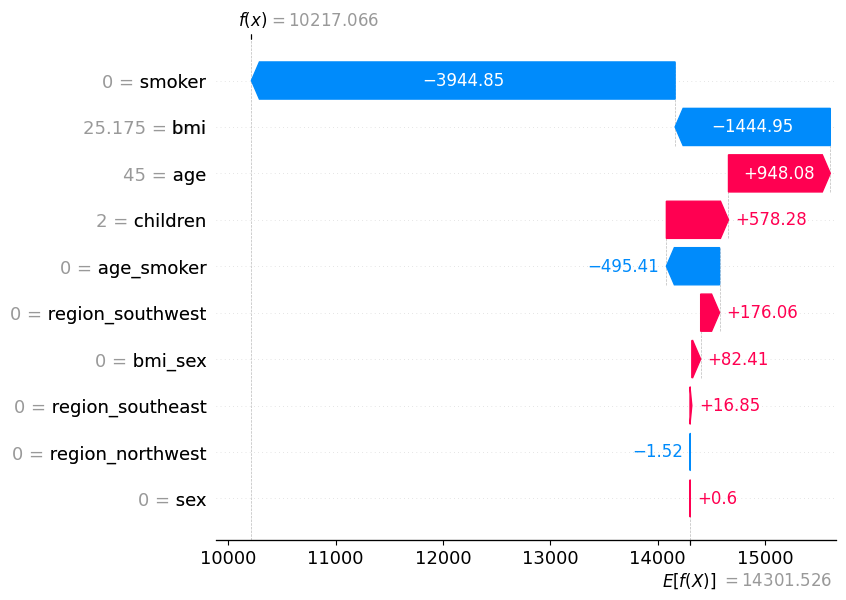

In [70]:
import shap

# Créer l'explainer SHAP pour XGBoost
explainer = shap.Explainer(best_xgb, X_train)

# Calcul des valeurs SHAP pour le jeu de test
shap_values = explainer(X_test)

# 🔹 Global : résumé des effets de chaque variable
shap.summary_plot(shap_values, X_test)

# 🔹 Local : explication pour un individu spécifique (ex. premier du test)
shap.plots.waterfall(shap_values[0])


In [71]:
from lime.lime_tabular import LimeTabularExplainer
import numpy as np

# Préparation de l'explainer
explainer_lime = LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns.tolist(),
    mode='regression'
)

# Explication d'une observation (ex : 0)
idx = 0
exp = explainer_lime.explain_instance(X_test.iloc[idx].values, best_xgb.predict, num_features=10)

# Affichage
exp.show_in_notebook()


. Interprétation locale : LIME
Tu as expliqué une prédiction locale avec :

 
📍 Valeur prédite : 1963.85
Et LIME t'indique les principales règles contribuant à cette prédiction, par exemple :

Feature/règle	Contribution à la prédiction
smoker <= 0.00	+20,071.57 🟢 (non-fumeur)
bmi <= 26.20	+2,957.47 🟢 (poids normal)
age_smoker <= 0.00	+2,776.56 🟢 (non-fumeur donc = 0)
39.50 < age <= 51.00	+1,459.85 🟢

✨ Interprétation :
Le client est non-fumeur → énorme effet positif (le modèle apprend que cela réduit beaucoup les charges).

Il a un IMC bas → bonus supplémentaire.

Les autres facteurs (région, sexe, enfants…) ont une contribution plus faible.

